In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

1.  Opis problemu, skąd pomysł, źródło danych
2. Wstępną analizę danych (histogramy, scatterploty, macierz korelacji między zmiennymi mierzonymi na skali ilorazowej, podstawowe statystyki opisowe: średnia, mediana, kwartyle, minimum, maksimum, współczynnik zmienności dla każdej zmiennej). Do wszystkiego ma być dorzucona interpretacja.
3. Faktyczną analizę

a.       W przypadku projektu z analizy skupień (ćwiczenia 1): Grupowanie metodą k-średnich (dla różnych wartości k), wraz z oceną jakości dopasowania dostępnymi metrykami (Silhouette, Caliński-Harabasz, wewnątrzgrupowa suma kwadratów). Na podstawie analizy wybrać odpowiednie k, i zwizualizować grupowanie dla 3 wybranych zmiennych (jeśli jest ich więcej). Centra klastrów zinterpretować (‘przeciętni przedstawiciele klastra’). Przeprowadzić również analizę skupień za pomocą metody aglomeracyjnej z użyciem różnych metod łączenia klastrów (np: ‘single’, ‘average’, ‘ward’, ‘median’), dokonać porównania, przedstawić dendrogramy wraz z opisem i decyzją ile klastrów powinno zostać wykorzystanych. Dodatkowo (dla chętnych): dorzucić dodatkowy algorytm klastrowania, np. DBScan, K-Medoids, MeanShift.

źródło danych - https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018/downloads/top-spotify-tracks-of-2018.zip/1

In [46]:
data = pd.read_csv('top2018.csv')

In [47]:
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


Usunięcie kolumn, które zawierają tekst i nie będą analizowane

In [48]:
data = data.drop(columns=['id','name','artists'])

In [49]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

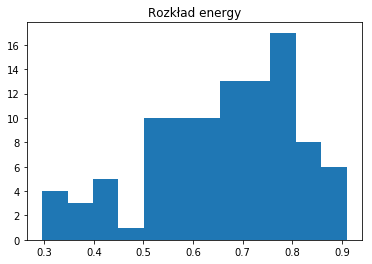

In [50]:
data['energy'].hist(bins=12)
plt.title('Rozkład energy')
plt.grid(None)
plt.show()

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

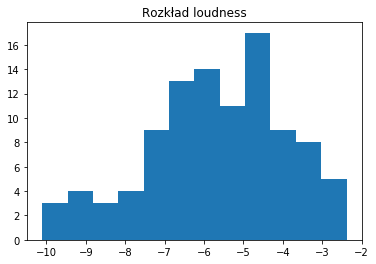

In [51]:
data['loudness'].hist(bins=12)
plt.title('Rozkład loudness')
plt.grid(None)
plt.show()

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

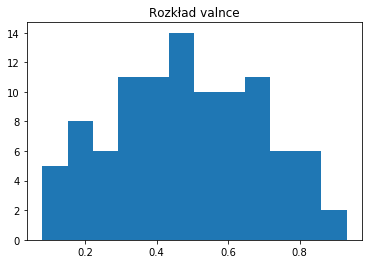

In [52]:
data['valence'].hist(bins=12)
plt.title('Rozkład valnce')
plt.grid(None)
plt.show()

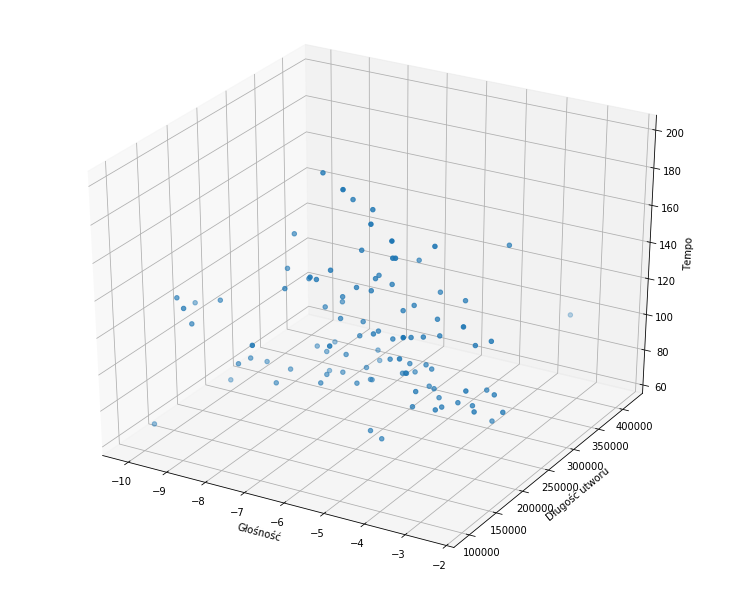

In [53]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(data['loudness'], data['duration_ms'], data['tempo'])
ax.set_xlabel('Głośność')
ax.set_ylabel('Długość utworu')
ax.set_zlabel('Tempo')
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data)

In [55]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.287854,-1.455314,0.456531,-1.997753,0.833616,-0.063162,-0.739184,-0.112147,3.543567,-0.621334,-1.491544,-0.156599,0.100504
1,0.180503,-0.319108,0.729903,0.450984,0.833616,0.282982,0.283383,0.159656,-0.317744,-0.055789,-1.566444,-0.969690,0.100504
2,-0.992691,-0.859498,-0.090213,-0.233147,-1.199593,-0.247772,-0.357995,-0.113440,-0.245738,-1.679294,1.394085,0.325071,0.100504
3,0.172835,-0.693224,0.729903,-1.319276,0.833616,0.013759,1.748092,-0.118343,-0.416751,-0.221552,0.705712,0.407795,0.100504
4,0.908957,-0.229043,-1.183701,-0.087840,0.833616,0.090680,-0.622280,-0.113859,2.139454,-0.655462,-1.007767,0.319494,0.100504


In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [57]:
kmeans.labels_

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [58]:
kmeans.cluster_centers_

array([[ 0.08802329,  0.49473255, -0.04465077,  0.5090741 , -0.12137643,
        -0.07796303, -0.31563984, -0.11071849,  0.02472035,  0.3309179 ,
        -0.05410493,  0.11431592,  0.17664301],
       [-0.15014753, -1.02367304,  0.13345526, -1.03261964,  0.21749177,
         0.17683717,  0.65733062, -0.0784288 , -0.04635809, -0.63281349,
         0.05734513, -0.21488397, -0.35633159],
       [-0.85466845,  1.12886239, -1.45707297,  0.47755747,  0.83361577,
        -0.69006625, -0.85968084,  9.89557074, -0.10172617, -0.957736  ,
         1.67853626, -0.45367952,  0.10050378]])

In [59]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[     0.72793939,      0.7304697 ,      5.16666667,
            -4.77725758,      0.53030303,      0.10746061,
             0.12631139,      0.00010202,      0.16104848,
             0.55231818,    118.35398485, 209757.39393939,
             4.01515152],
       [     0.69687879,      0.51130303,      5.81818182,
            -7.504     ,      0.6969697 ,      0.13396061,
             0.34020818,      0.0005341 ,      0.15315152,
             0.35464545,    121.54721212, 196652.81818182,
             3.90909091],
       [     0.605     ,      0.822     ,      0.        ,
            -4.833     ,      1.        ,      0.0438    ,
             0.00671   ,      0.134     ,      0.147     ,
             0.288     ,    167.997     , 187147.        ,
             4.        ]])

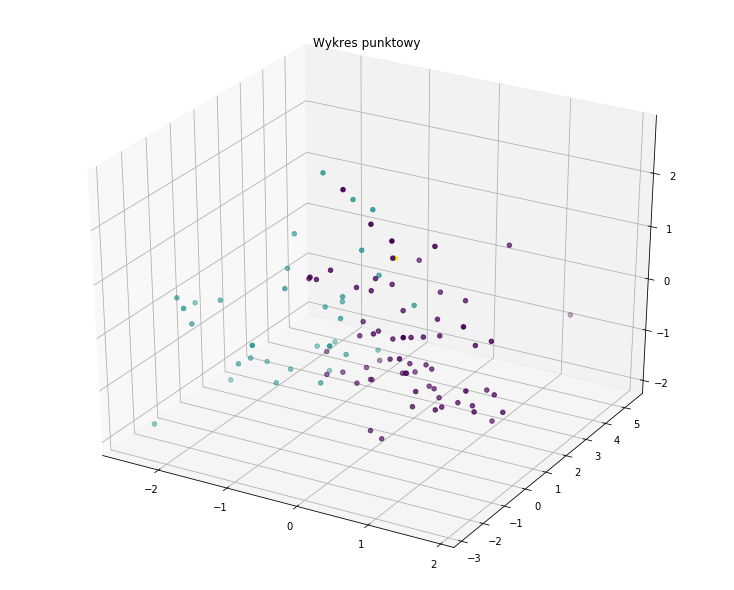

In [60]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    data['loudness'],
    data['duration_ms'],
    data['tempo'],
    c=kmeans.labels_
)
plt.title('Wykres punktowy')
plt.show()